## Merge to 1 file with 2013 as refrence

In [ ]:
import pandas as pd
features_file = 'Feature_comparison.xlsx'
features_data = pd.read_excel(features_file)

base_year = 2013
mapping_dict = {}
for year in features_data.columns[0:-1]:
    if year != base_year:
        year_mapping = dict(zip(features_data[year], features_data[base_year]))
        year_mapping = {k: v for k, v in year_mapping.items() if pd.notna(k)}
        mapping_dict[year] = year_mapping

mapping_dict

In [ ]:
import pandas as pd
import os

directory = r'./Yearly' 
files = [
    '2009.csv', 
    '2010.csv', '2011.csv', '2012.csv', 
    '2013.csv',
    '2014.csv', '2015.csv', '2016.csv', '2017.csv',
    '2018.xlsx', '2019.csv', '2020.xlsx', '2021.csv'
]
reference_df = pd.read_csv(os.path.join(directory, '2013.csv'))
reference_columns = reference_df.columns.tolist()
dataframes = []
for file in files:
    file_path = os.path.join(directory, file)
    year = int(file[:4])
    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    
    if year in mapping_dict:
        for original_col, standard_col in mapping_dict[year].items():
            if original_col in df.columns:
                if standard_col in df.columns:
                    df[standard_col] = df[standard_col].combine_first(df[original_col])
                else:
                    df.rename(columns={original_col: standard_col}, inplace=True)
    
    for col in reference_columns:
        if col not in df.columns:
            df[col] = None
    
    df = df[reference_columns]
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

# some feature handling ( consistency across different years based )
merged_df.loc[merged_df['Year'].isin([2019, 2020, 2021]), 'Self'] = merged_df['Self'].map({0: 2, 1: 1})
merged_df['CoAge'] = merged_df['CoAge'].replace(98, 998)

output_file = os.path.join(directory, 'merged_data.csv')
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved to: {output_file}")

C:\Users\Matin\AppData\Local\Temp\ipykernel_33208\4206836889.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dataframes, ignore_index=True)


Merged file saved to: ./Yearly\merged_data.csv


## Imports and Methods and important variables

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

missing_indicators = {
    'Year': [], 
    'Loan Number': [], 
    'FHLBankID': [], 
    'Program': [], 
    'FIPSStateCode': [],
    'FIPSCountyCode': [], 
    # 'MSA': [99999], 
    'MSA': [],
    'FeatureID': [], 
    'Tract': [], 
    'MinPer': [], 
    'TraMedY': [],
    'LocMedY': [], 
    'Tractrat': [],
    'Income': [], 
    'CurAreY': [], 
    'IncRat': [], 
    'UPB': [], 
    'LTV': [],
    'MortDate': [],
    'AcquDate': [], 
    'Purpose': [], 
    'Coop': [], 
    'Product': [], 
    'FedGuar': [], 
    'Term': [],
    'AmorTerm': [998], 
    'FHFBID': [], 
    'Seller': [], 
    'SellCity': [], 
    'SellSt': [], 
    'SellType': [],
    'NumBor': [], 
    'First': [2], 
    'CICA': [], 
    'BoRace': [], 
    'CoRace': [], 
    'BoGender': [], 
    'CoGender': [],
    'BoAge': [999, 99], 
    'CoAge': [999, 99], 
    'Occup': [], 
    'NumUnits': [], 
    'Bed1': [],
    'Bed2': [], 
    'Bed3': [], 
    'Bed4': [],
    'Aff1': [], 
    'Aff2': [], 
    'Aff3': [], 
    'Aff4': [], 
    # 'Rent1': [9999999999], 
    # 'Rent2': [9999999999],
    # 'Rent3': [9999999999], 
    # 'Rent4': [9999999999],
    # 'RentUt1': [9999999999], 
    # 'RentUt2': [9999999999], 
    # 'RentUt3': [9999999999], 
    # 'RentUt4': [9999999999],
    'Rent1': [], 
    'Rent2': [],
    'Rent3': [], 
    'Rent4': [],
    'RentUt1': [], 
    'RentUt2': [], 
    'RentUt3': [], 
    'RentUt4': [], 
    'Geog': [], 
    'Rate': [], 
    'Amount': [],
    'Front': [], 
    'Back': [], 
    'Borrower Credit Score': [9], 
    'Co-Borrower Credit Score': [],
    'PMI': [], 
    'Self': [0], 
    'PropType': [], 
    'ArmIndex': [], 
    'ArmMarg': [99999], 
    'PrepayP': ['12/31/9999', '9999-12-31 00:00:00', '9999-12-31'], 
    'BoEth': [3],
    'Race2': [6], 
    'Race3': [6], 
    'Race4': [6], 
    'Race5': [6], 
    'CoEth': [3], 
    'Corace2': [6], 
    'Corace3': [6],
    'Corace4': [6], 
    'Corace5': [6], 
    'HOEPA': [], 
    'LienStatus': [], 
    'SpcHsgGoals': [],
    'FedFinStbltyPlan': [], 
    'AcqTyp': [], 
    'GSEREO': [],
}
len(missing_indicators)



def missing_percentage(df, num_subplots = 2):
    missing_percentages = {}
    for column in df.columns:
        total_missing_explicit = 0
        if column in missing_indicators:
            total_missing_explicit = df[column].isin(missing_indicators[column]).sum()
        
        total_missing_nan = df[column].isna().sum()
        total_missing = total_missing_explicit + total_missing_nan
        total_rows = len(df[column])
        
        missing_percentages[column] = (total_missing / total_rows) * 100

    for column, percentage in missing_percentages.items():
        if percentage != 0:
            print(f"{column}: {percentage:.2f}% missing")

    filtered_missing = {col: perc for col, perc in missing_percentages.items()}
    df_missing = pd.DataFrame(filtered_missing.items(), columns=["Column", "Missing Percentage"])
    # df_missing.to_csv("missing_percentages.csv", index=False)

    # Filter out columns with missing values
    df_missing_filtered = df_missing[df_missing["Missing Percentage"] > 0]

    if (num_subplots > 1) :
        split_size = len(df_missing_filtered) // num_subplots
        # Create compact horizontal bar plots
        for i in range(num_subplots):
            start_idx = i * split_size
            end_idx = (i + 1) * split_size if i < num_subplots - 1 else len(df_missing_filtered)
            subset = df_missing_filtered.iloc[start_idx:end_idx]

            plt.figure(figsize=(6, max(len(subset) / 4, 4)))  # Reduce height for compactness
            colors = plt.cm.coolwarm(np.linspace(0, 1, len(subset)))
            bars = plt.barh(subset["Column"], subset["Missing Percentage"], color=colors, height=0.5)  # Horizontal bars
            
            for bar in bars:
                xval = bar.get_width()
                plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", 
                        va='center', ha='left', fontsize=8)  # Smaller text annotations
            
            plt.xlabel("Missing Percentage (%)", fontsize=10)
            plt.ylabel("Columns", fontsize=10)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
            plt.title(f"Missing Values Percentage by Column (Part {i+1})", fontsize=12)
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            
            plt.tight_layout()  # Optimize spacing
            plt.show()

    else:
        plt.figure(figsize=(max(len(df_missing_filtered) * 0.6, 6), 6))
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(df_missing_filtered)))
        plt.bar(df_missing_filtered["Column"], df_missing_filtered["Missing Percentage"], color=colors)
        plt.ylabel("Missing Percentage (%)")
        plt.xlabel("Columns")
        plt.title("Missing Values Percentage by Column")
        plt.xticks(rotation=90)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    return df_missing

def mod_percentage(df, num_subplots = 2):
    repetition_data = {}
    for column in df.columns:
        if not df[column].isna().all():
            most_common_value = df[column].mode()[0]
            most_common_count = (df[column] == most_common_value).sum()
            total_rows = len(df[column])
            repetition_percentage = (most_common_count / total_rows) * 100

            repetition_data[column] = {
                "Most Common Value": most_common_value,
                "Repetition Percentage": repetition_percentage
            }

    for column, data in repetition_data.items():
        print(f"{column}: {data['Repetition Percentage']:.2f}% repetition (Mode: {data['Most Common Value']})")

    df_repetition = pd.DataFrame.from_dict(repetition_data, orient='index').reset_index()
    df_repetition.columns = ["Column", "Most Common Value", "Repetition Percentage"]
    # df_repetition.to_csv("repetition_percentages.csv", index=False)
    df_repetition_filtered = df_repetition[df_repetition["Repetition Percentage"] > 0]

    # plt.figure(figsize=(max(len(df_repetition_filtered), 6), 6))
    # Define the number of subplots
    split_size = len(df_repetition_filtered) // num_subplots

    # Create compact plots
    for i in range(num_subplots):
        start_idx = i * split_size
        end_idx = (i + 1) * split_size if i < num_subplots - 1 else len(df_repetition_filtered)
        subset = df_repetition_filtered.iloc[start_idx:end_idx]

        plt.figure(figsize=(6, max(len(subset) / 4, 4)))  # Reduce height for compactness
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(subset)))
        bars = plt.barh(subset["Column"], subset["Repetition Percentage"], color=colors, height=0.5)  # Reduce bar height
        
        for bar in bars:
            xval = bar.get_width()
            plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", 
                    va='center', ha='left', fontsize=8)  # Reduce font size
        
        plt.xlabel("Repetition Percentage (%)", fontsize=10)
        plt.ylabel("Columns", fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.title(f"Repetition Percentage by Column (Part {i+1})", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        plt.tight_layout()  # Ensure better spacing
        plt.show()



    return df_repetition

def data_analysis(merged_df, df_missing, df_repetition): 
    def explore_dataframe(df):
        column_summary = []

        for column in df.columns:
            column_data = df[column]
            column_type = column_data.dtype
            unique_values = column_data.nunique()
            
            # Most common value
            if unique_values > 0:
                most_common_value = column_data.mode()[0]
                most_common_freq = (column_data == most_common_value).sum()
            else:
                most_common_value, most_common_freq = None, 0
            
            # Numeric column statistics
            if pd.api.types.is_numeric_dtype(column_data):
                col_min = column_data.min()
                col_max = column_data.max()
                col_mean = column_data.mean()
                col_std = column_data.std()
            else:
                col_min = col_max = col_mean = col_std = None

            column_summary.append({
                "Column": column,
                "Data Type": column_type,
                "Unique Values": unique_values,
                "Most Common Value": most_common_value,
                "Most Common Count": most_common_freq,
                "Min": col_min,
                "Max": col_max,
                "Mean": col_mean,
                "Std Dev": col_std
            })

        return pd.DataFrame(column_summary)

    df_summary = explore_dataframe(merged_df)
    df_final_summary = df_summary.merge(df_repetition, on="Column", how="left").merge(df_missing, on="Column", how="left")
    desired_order = ["Column"] + [col for col in df_final_summary.columns if col not in ["Column", "Missing Percentage"]] + ["Missing Percentage"]
    df_final_summary = df_final_summary[desired_order]
    # df_final_summary.to_csv("dataframe_summary.csv", index=False)
    df_final_summary.to_excel("dataframe_summary.xlsx", index=False)
    print("dataframe_summary.xlsx has been saved successfully.")

    return df_final_summary


def replace_missing_with_nan(df, missing_indicators):
    df_copy = df.copy()
    
    for column, missing_values in missing_indicators.items():
        if column in df_copy.columns:
            df_copy[column] = df_copy[column].replace(missing_values, np.nan)
    
    return df_copy

## Full Analyze Raw Data

C:\Users\Matin\AppData\Local\Temp\ipykernel_5364\3722951438.py:1: DtypeWarning: Columns (2,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Yearly/merged_data.csv')


FHLBankID: 6.79% missing
Program: 62.77% missing
FeatureID: 38.54% missing
Tractrat: 31.83% missing
IncRat: 31.83% missing
Coop: 31.83% missing
FHFBID: 62.77% missing
Seller: 62.77% missing
SellCity: 62.77% missing
SellSt: 62.77% missing
First: 58.62% missing
CICA: 31.83% missing
BoAge: 7.85% missing
CoAge: 5.13% missing
Bed1: 31.83% missing
Bed2: 31.83% missing
Bed3: 31.83% missing
Bed4: 31.83% missing
Aff1: 31.83% missing
Aff2: 31.83% missing
Aff3: 31.83% missing
Aff4: 31.83% missing
Rent1: 31.83% missing
Rent2: 31.83% missing
Rent3: 31.83% missing
Rent4: 31.83% missing
RentUt1: 31.83% missing
RentUt2: 31.83% missing
RentUt3: 31.83% missing
RentUt4: 31.83% missing
Geog: 31.83% missing
Borrower Credit Score: 0.17% missing
ArmMarg: 68.17% missing
PrepayP: 100.00% missing
BoEth: 7.03% missing
Race2: 72.09% missing
Race3: 72.23% missing
Race4: 72.23% missing
Race5: 72.23% missing
CoEth: 4.23% missing
Corace2: 44.10% missing
Corace3: 44.15% missing
Corace4: 44.15% missing
Corace5: 44.15% 

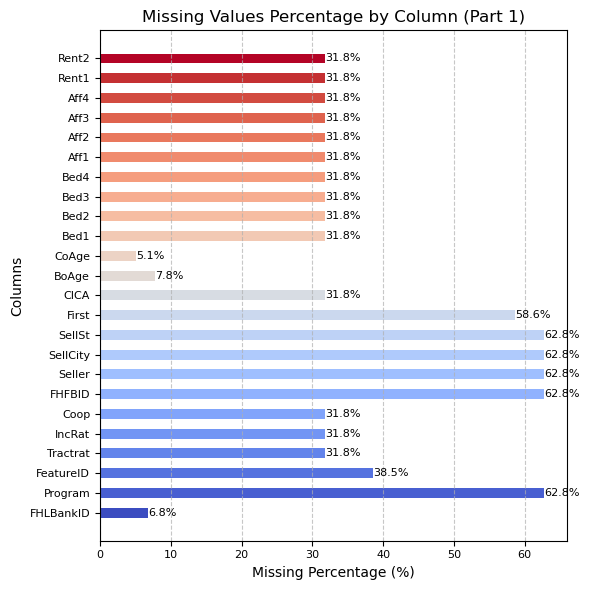

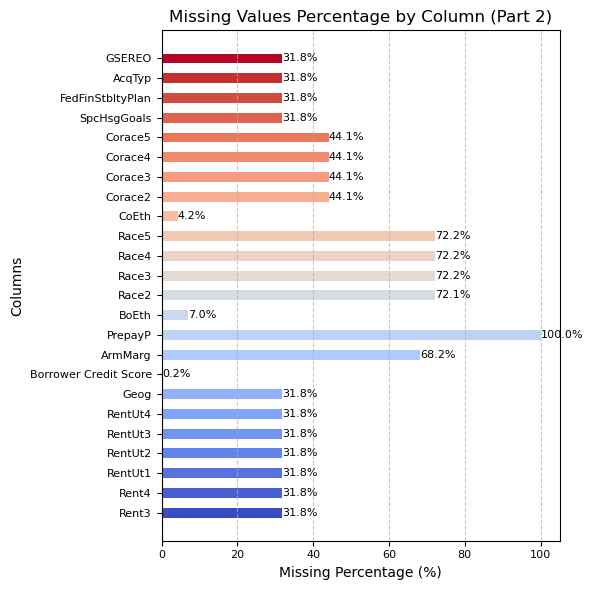

Year: 12.07% repetition (Mode: 2019)
Loan Number: 0.00% repetition (Mode: 1)
FHLBankID: 17.28% repetition (Mode: Topeka)
Program: 13.12% repetition (Mode: 6.0)
FIPSStateCode: 13.48% repetition (Mode: 39)
FIPSCountyCode: 3.73% repetition (Mode: 61)
MSA: 16.66% repetition (Mode: 99999)
FeatureID: 15.21% repetition (Mode: 9999999999.0)
Tract: 0.69% repetition (Mode: 9601.0)
MinPer: 0.57% repetition (Mode: 2.0)
TraMedY: 0.12% repetition (Mode: 73750)
LocMedY: 2.41% repetition (Mode: 54771)
Tractrat: 0.26% repetition (Mode: 1.06)
Income: 0.16% repetition (Mode: 60000)
CurAreY: 1.55% repetition (Mode: 70400)
IncRat: 0.11% repetition (Mode: 0.0001)
UPB: 0.91% repetition (Mode: 100000)
LTV: 18.23% repetition (Mode: 0.8)
MortDate: 12.49% repetition (Mode: 2019)
AcquDate: 12.07% repetition (Mode: 2019)
Purpose: 50.31% repetition (Mode: 2)
Coop: 68.17% repetition (Mode: 2.0)
Product: 100.00% repetition (Mode: 1)
FedGuar: 92.10% repetition (Mode: 0)
Term: 71.56% repetition (Mode: 360)
AmorTerm: 71

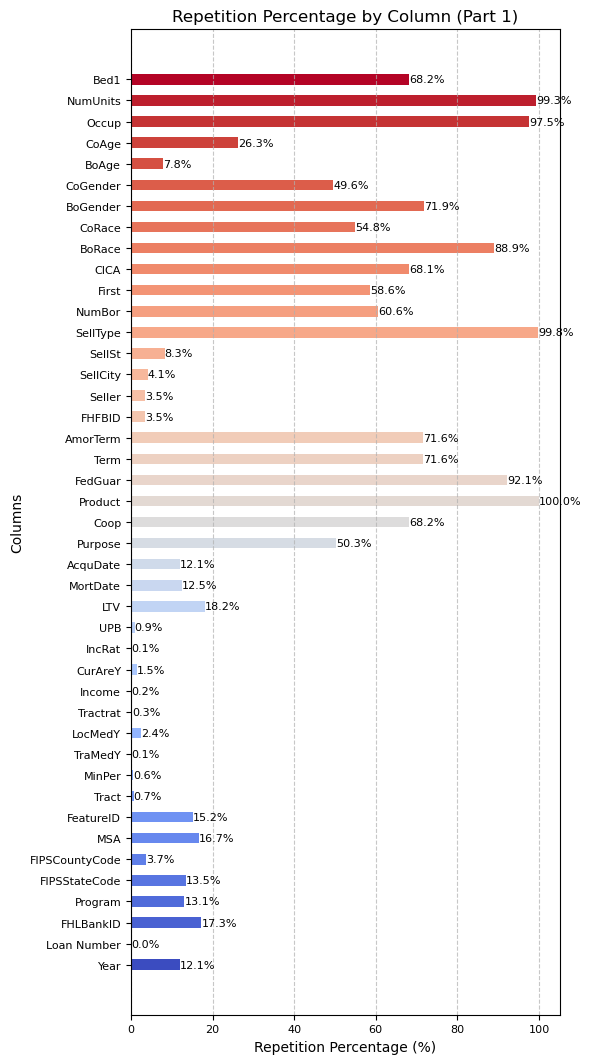

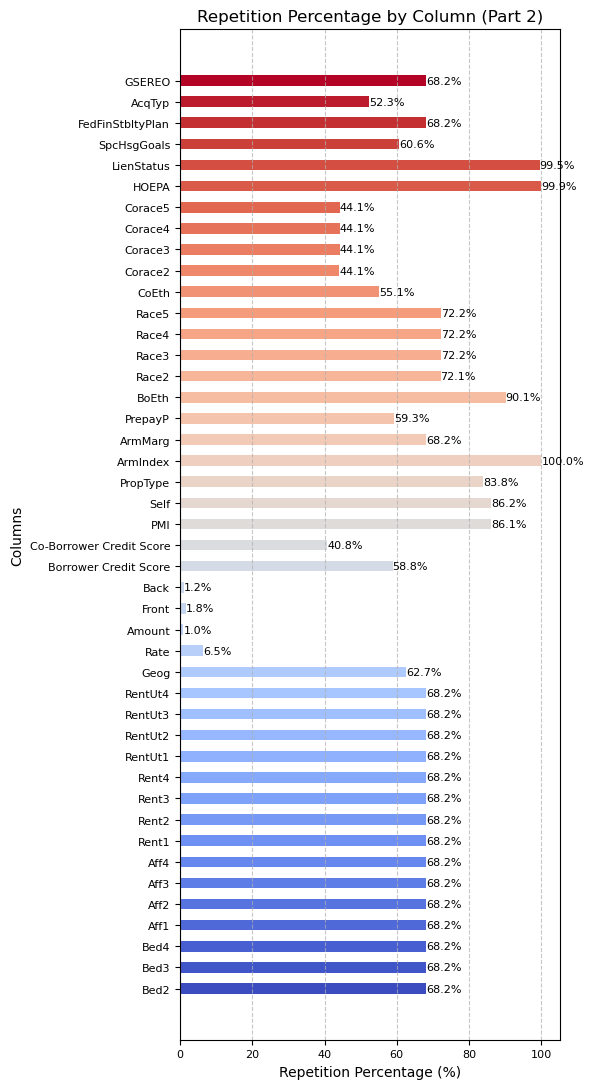

dataframe_summary.xlsx has been saved successfully.


,Column,Data Type,Unique Values,Most Common Value_x,Most Common Count,Min,Max,Mean,Std Dev,Most Common Value_y,Repetition Percentage,Missing Percentage
0,Year,int64,13,2019,89767,2009.0,2021.0,2.015711e+03,3.785652e+00,2019,12.068166,0.000000
1,Loan Number,int64,533336,1,6,1.0,2690373.0,1.456297e+06,1.118998e+06,1,0.000807,0.000000
2,FHLBankID,object,11,Topeka,128566,NaN,NaN,NaN,NaN,Topeka,17.284256,6.789427
3,Program,float64,6,6.0,97575,1.0,7.0,3.718827e+00,2.158264e+00,6.0,13.117864,62.772827
4,FIPSStateCode,int64,54,39,100232,1.0,78.0,2.891892e+01,1.299438e+01,39,13.475068,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
82,LienStatus,int64,2,1,739939,1.0,4.0,1.015705e+00,2.164921e-01,1,99.476495,0.000000
83,SpcHsgGoals,float64,2,2.0,450733,1.0,2.0,1.888897e+00,3.142600e-01,2.0,60.595994,31.830129
84,FedFinStbltyPlan,float64,1,2.0,507070,2.0,2.0,2.000000e+00,0.000000e+00,2.0,68.169871,31.830129
85,AcqTyp,float64,3,1.0,388914,1.0,4.0,1.691372e+00,1.257285e+00,1.0,52.285123,31.830129


In [26]:
df = pd.read_csv('Yearly/merged_data.csv')
df_missing = missing_percentage(df)
df_repetition = mod_percentage(df)
df_final_summary = data_analysis(df, df_missing, df_repetition)
df_final_summary

## Dropping Columns

In [1]:
feature_to_drop = [
 'Loan Number',
 'Program',
 'FeatureID',
 'Tractrat',
 'IncRat',
 'Coop',
 'FedGuar',
 'AmorTerm',
 'FHFBID',
 'Seller',
 'SellCity',
 'SellSt',
 'SellType',
 'First',
 'CICA',
 'Occup',
 'Product',
 'NumUnits',
 'Bed1',
 'Bed2',
 'Bed3',
 'Bed4',
 'Aff1',
 'Aff2',
 'Aff3',
 'Aff4',
 'Rent1',
 'Rent2',
 'Rent3',
 'Rent4',
 'RentUt1',
 'RentUt2',
 'RentUt3',
 'RentUt4',
 'Geog',
 'PMI',
 'PropType',
 'ArmIndex',
 'ArmMarg',
 'PrepayP',
 'BoEth',
 'Race2',
 'Race3',
 'Race4',
 'Race5',
 'CoEth',
 'Corace2',
 'Corace3',
 'Corace4',
 'Corace5',
 'HOEPA',
 'LienStatus',
 'SpcHsgGoals',
 'FedFinStbltyPlan',
 'AcqTyp',
 'GSEREO']

len(feature_to_drop)

56

In [7]:
df = pd.read_csv('Yearly/merged_data.csv')
df = df.drop(columns=[col for col in feature_to_drop if col in df.columns])
print("Columns removed successfully. Remaining columns:")
print(df.columns)
df = replace_missing_with_nan(df, missing_indicators)
df.to_csv("merged_data_step_1_dropped.csv", index=False)

df


C:\Users\Matin\AppData\Local\Temp\ipykernel_22824\2637332596.py:1: DtypeWarning: Columns (2,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Yearly/merged_data.csv')


Columns removed successfully. Remaining columns:
Index(['Year', 'FHLBankID', 'FIPSStateCode', 'FIPSCountyCode', 'MSA', 'Tract',
       'MinPer', 'TraMedY', 'LocMedY', 'Income', 'CurAreY', 'UPB', 'LTV',
       'MortDate', 'AcquDate', 'Purpose', 'Term', 'NumBor', 'BoRace', 'CoRace',
       'BoGender', 'CoGender', 'BoAge', 'CoAge', 'Rate', 'Amount', 'Front',
       'Back', 'Borrower Credit Score', 'Co-Borrower Credit Score', 'Self'],
      dtype='object')


,Year,FHLBankID,FIPSStateCode,FIPSCountyCode,MSA,Tract,MinPer,TraMedY,LocMedY,Income,...,CoGender,BoAge,CoAge,Rate,Amount,Front,Back,Borrower Credit Score,Co-Borrower Credit Score,Self
0,2009,NaN,39,37,99999,5701.02,1.800,45735,43801,39312,...,4,35.0,98.0,0.0463,156200,0.31,0.31,5.0,9,2
1,2009,NaN,21,117,17140,647.00,2.430,67218,54771,75322,...,4,36.0,98.0,0.0488,148000,0.19,0.23,5.0,9,2
2,2009,NaN,21,211,31140,405.00,16.380,66717,49301,40344,...,2,42.0,38.0,0.0488,104000,0.23,0.24,5.0,5,2
3,2009,NaN,21,123,21060,9601.00,8.060,40083,42911,88440,...,2,33.0,32.0,0.0488,187200,0.18,0.35,5.0,5,2
4,2009,NaN,21,211,31140,401.00,3.780,48655,49301,91224,...,2,41.0,40.0,0.0500,136000,0.12,0.43,4.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743828,2021,Topeka,20,113,32700,7881.00,2.967,76364,71728,5936,...,4,81.0,998.0,2.8750,164900,24.38,25.38,4.0,9,2
743829,2021,Topeka,8,5,19740,832.00,36.160,110260,98577,6331,...,2,59.0,58.0,2.7500,410000,34.79,51.21,3.0,5,2
743830,2021,Topeka,8,41,17820,69.02,22.138,88309,81873,6927,...,2,37.0,29.0,2.3750,540000,36.01,45.03,5.0,5,2
743831,2021,Topeka,8,41,17820,51.06,28.995,90585,81873,12905,...,2,41.0,38.0,2.5000,354700,16.40,22.51,1.0,1,2


## Full Analysis Step 1

C:\Users\Matin\AppData\Local\Temp\ipykernel_5364\758318.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_data_step_1_dropped.csv')


FHLBankID: 6.79% missing
BoAge: 7.85% missing
CoAge: 5.13% missing
Borrower Credit Score: 0.17% missing


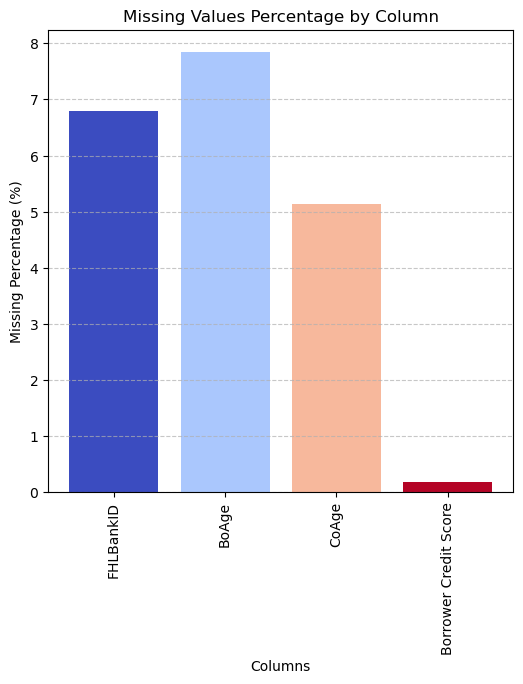

Year: 12.07% repetition (Mode: 2019)
FHLBankID: 17.28% repetition (Mode: Topeka)
FIPSStateCode: 13.48% repetition (Mode: 39)
FIPSCountyCode: 3.73% repetition (Mode: 61)
MSA: 16.66% repetition (Mode: 99999)
Tract: 0.69% repetition (Mode: 9601.0)
MinPer: 0.57% repetition (Mode: 2.0)
TraMedY: 0.12% repetition (Mode: 73750)
LocMedY: 2.41% repetition (Mode: 54771)
Income: 0.16% repetition (Mode: 60000)
CurAreY: 1.55% repetition (Mode: 70400)
UPB: 0.91% repetition (Mode: 100000)
LTV: 18.23% repetition (Mode: 0.8)
MortDate: 12.49% repetition (Mode: 2019)
AcquDate: 12.07% repetition (Mode: 2019)
Purpose: 50.31% repetition (Mode: 2)
Term: 71.56% repetition (Mode: 360)
NumBor: 60.55% repetition (Mode: 2)
BoRace: 88.90% repetition (Mode: 5)
CoRace: 54.84% repetition (Mode: 5)
BoGender: 71.88% repetition (Mode: 1)
CoGender: 49.57% repetition (Mode: 2)
BoAge: 2.68% repetition (Mode: 35.0)
CoAge: 26.31% repetition (Mode: 98.0)
Rate: 6.50% repetition (Mode: 0.0388)
Amount: 0.99% repetition (Mode: 100

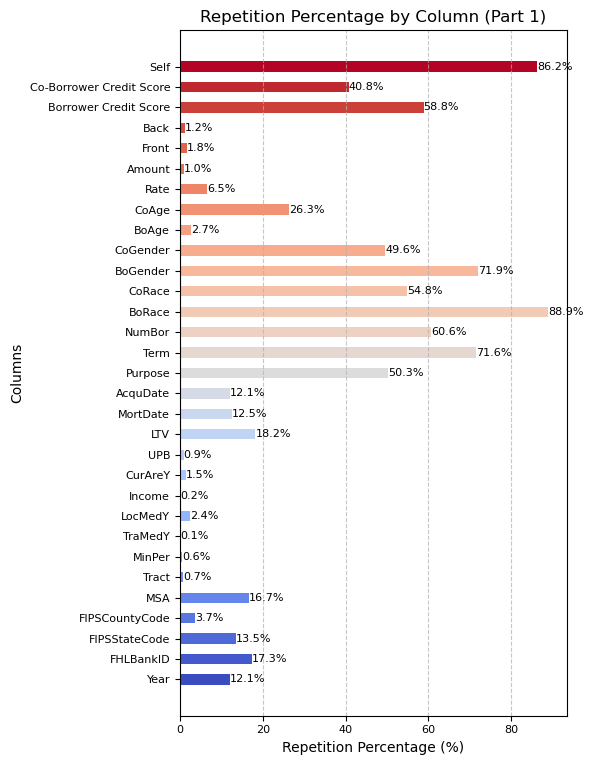

dataframe_summary.xlsx has been saved successfully.


,Column,Data Type,Unique Values,Most Common Value_x,Most Common Count,Min,Max,Mean,Std Dev,Most Common Value_y,Repetition Percentage,Missing Percentage
0,Year,int64,13,2019,89767,2009.0000,2021.00,2015.710653,3.785652,2019,12.068166,0.000000
1,FHLBankID,object,11,Topeka,128566,NaN,NaN,NaN,NaN,Topeka,17.284256,6.789427
2,FIPSStateCode,int64,54,39,100232,1.0000,78.00,28.918924,12.994376,39,13.475068,0.000000
3,FIPSCountyCode,int64,275,61,27729,1.0000,840.00,84.843860,68.565875,61,3.727853,0.000000
4,MSA,int64,1012,99999,123948,29.0000,99999.00,40097.304129,28534.893908,99999,16.663418,0.000000
5,Tract,float64,20693,9601.0,5133,1.0000,47700.00,3110.106976,3891.420896,9601.0,0.690074,0.000000
6,MinPer,float64,30927,2.0,4212,0.0000,100.00,13.884637,15.829420,2.0,0.566256,0.000000
7,TraMedY,int64,64835,73750,865,0.0000,250001.00,76388.481273,29187.221755,73750,0.116290,0.000000
8,LocMedY,int64,5537,54771,17936,0.0000,150332.00,64695.579389,14730.638547,54771,2.411294,0.000000
9,Income,int64,160283,60000,1224,1.0000,36178212.00,74241.086179,108029.310021,60000,0.164553,0.000000


In [21]:
df = pd.read_csv('merged_data_step_1_dropped.csv')
df_missing = missing_percentage(df, num_subplots = 1)
df_repetition = mod_percentage(df, num_subplots = 1)
df_final_summary = data_analysis(df, df_missing, df_repetition)
df_final_summary

## Full Analysis Step 2

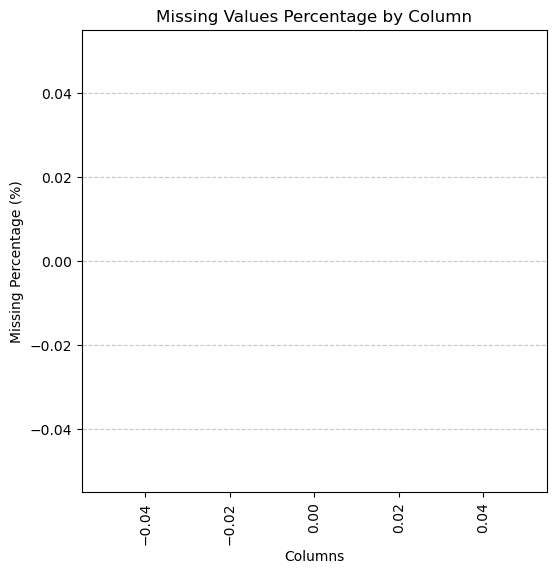

Year: 13.13% repetition (Mode: 2019)
FHLBankID: 20.79% repetition (Mode: Cincinnati)
FIPSStateCode: 14.58% repetition (Mode: 39)
FIPSCountyCode: 3.82% repetition (Mode: 61)
MSA: 16.24% repetition (Mode: 99999)
Tract: 0.66% repetition (Mode: 9601.0)
MinPer: 0.59% repetition (Mode: 2.0)
TraMedY: 0.12% repetition (Mode: 73750)
LocMedY: 2.61% repetition (Mode: 54771)
Income: 0.16% repetition (Mode: 60000)
CurAreY: 1.61% repetition (Mode: 70400)
UPB: 0.89% repetition (Mode: 100000)
LTV: 17.43% repetition (Mode: 0.8)
MortDate: 13.58% repetition (Mode: 2019)
AcquDate: 13.13% repetition (Mode: 2019)
Purpose: 49.27% repetition (Mode: 2)
Term: 72.06% repetition (Mode: 360)
NumBor: 60.23% repetition (Mode: 2)
BoRace: 88.81% repetition (Mode: 5)
CoRace: 54.51% repetition (Mode: 5)
BoGender: 71.81% repetition (Mode: 1)
CoGender: 49.24% repetition (Mode: 2)
BoAge: 2.91% repetition (Mode: 36.0)
CoAge: 39.49% repetition (Mode: 998.0)
Rate: 6.36% repetition (Mode: 0.0388)
Amount: 0.97% repetition (Mode

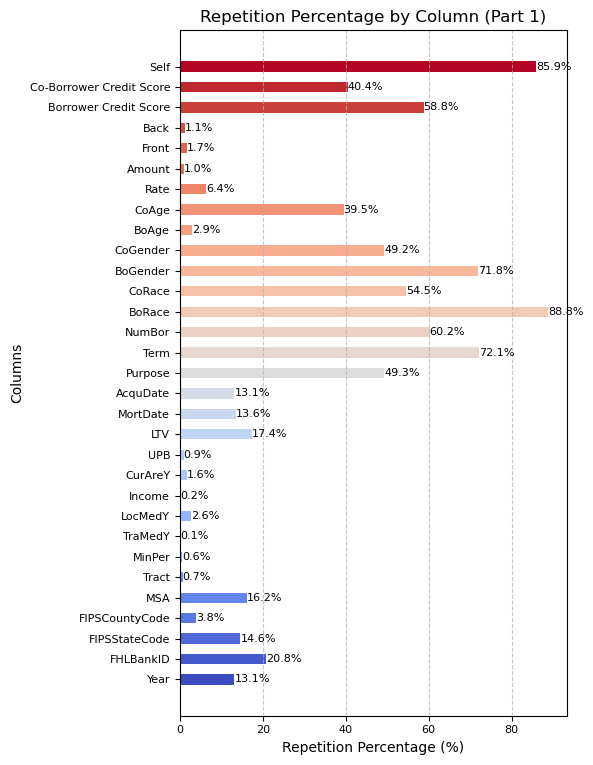

dataframe_summary.xlsx has been saved successfully.


,Column,Data Type,Unique Values,Most Common Value_x,Most Common Count,Min,Max,Mean,Std Dev,Most Common Value_y,Repetition Percentage,Missing Percentage
0,Year,int64,13,2019,89608,2009.0000,2021.00,2015.935657,3.780483,2019,13.127569,0.0
1,FHLBankID,object,11,Cincinnati,141923,NaN,NaN,NaN,NaN,Cincinnati,20.791715,0.0
2,FIPSStateCode,int64,54,39,99530,1.0000,78.00,29.200367,13.164784,39,14.581142,0.0
3,FIPSCountyCode,int64,274,61,26083,1.0000,840.00,84.890497,69.554665,61,3.821159,0.0
4,MSA,int64,1002,99999,110859,29.0000,99999.00,39764.683655,28310.415400,99999,16.240840,0.0
5,Tract,float64,20455,9601.0,4474,1.0000,47700.00,3070.974659,3869.722494,9601.0,0.655441,0.0
6,MinPer,float64,30799,2.0,4036,0.0000,100.00,14.072466,16.024986,2.0,0.591274,0.0
7,TraMedY,int64,63796,73750,822,0.0000,250001.00,77279.961476,29409.485553,73750,0.120423,0.0
8,LocMedY,int64,5456,54771,17789,0.0000,150332.00,65346.707951,14710.811460,54771,2.606088,0.0
9,Income,int64,150494,60000,1068,12.0000,36178212.00,72238.658816,108476.343440,60000,0.156462,0.0


In [15]:
df = pd.read_csv('merged_data_step_2_Cleaned.csv')
df_missing = missing_percentage(df)
df_repetition = mod_percentage(df, num_subplots = 1)
df_final_summary = data_analysis(df, df_missing, df_repetition)
df_final_summary